# Mortality Rate Prediction of ICD 10 Diagnostic Group for the ireland population

## The Dataset : Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease  Dataset- (G0315)

In [1]:
#Importing all the necessary libraries for Data Cleaning,Data Visualization, Data Preparation, Statistical analysis and Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# suppressing the warning messages
import warnings
warnings.filterwarnings('ignore') 

In [3]:
#Import the csv Dataset
colnames = ['Statistic Label', 'Area of Residence', 'ICD 10 Diagnostic Group','Year','UNIT','Mortality Rate(per 1000)']
pop_data = pd.read_csv("G0315.20231020T111006.csv", header=0, names = colnames)

# Early Data  Analysis (EDA)

This process involves:-

a) View the first and last few observations of the pop_data dataset

b) View the number of observations and variables the pop_data dataset has

c) View the entire pop_data dataset to check the data types and any missing data in a particluar variable.

d) Check for any outliers

e) perform summary statistics for categorical and numeric varaibles

In [4]:
#View the pop_data
pop_data

,Statistic Label,Area of Residence,ICD 10 Diagnostic Group,Year,UNIT,Mortality Rate(per 1000)
0,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2007,No. per 1000 Pop.,1.87
1,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2008,No. per 1000 Pop.,1.90
2,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2009,No. per 1000 Pop.,1.91
3,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2010,No. per 1000 Pop.,1.83
4,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2011,No. per 1000 Pop.,1.94
...,...,...,...,...,...,...
1887,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2013,No. per 1000 Pop.,0.35
1888,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2014,No. per 1000 Pop.,0.39
1889,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2015,No. per 1000 Pop.,0.36
1890,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2016,No. per 1000 Pop.,0.38


In [5]:
#View the pop_data column names, variables data types and missing data points
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           1892 non-null   object 
 1   Area of Residence         1892 non-null   object 
 2   ICD 10 Diagnostic Group   1892 non-null   object 
 3   Year                      1892 non-null   int64  
 4   UNIT                      1892 non-null   object 
 5   Mortality Rate(per 1000)  1720 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 88.8+ KB


### Findings
1. The data has some columns that i will not use (statistic label, unit), I will drop them.
2. The variables need to be encoded.
3. The data has missing data points from the mortality rate variable

In [6]:
#View the first 5 observations of the pop_data dataset
pop_data.head()

,Statistic Label,Area of Residence,ICD 10 Diagnostic Group,Year,UNIT,Mortality Rate(per 1000)
0,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2007,No. per 1000 Pop.,1.87
1,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2008,No. per 1000 Pop.,1.90
2,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2009,No. per 1000 Pop.,1.91
3,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2010,No. per 1000 Pop.,1.83
4,Mortality rate attributed to cardiovascular di...,State,Neoplasms,2011,No. per 1000 Pop.,1.94


In [7]:
#View the last 5 observations of the pop_data dataset
pop_data.tail()

,Statistic Label,Area of Residence,ICD 10 Diagnostic Group,Year,UNIT,Mortality Rate(per 1000)
1887,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2013,No. per 1000 Pop.,0.35
1888,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2014,No. per 1000 Pop.,0.39
1889,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2015,No. per 1000 Pop.,0.36
1890,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2016,No. per 1000 Pop.,0.38
1891,Mortality rate attributed to cardiovascular di...,South-West,External causes of injury and poisoning,2017,No. per 1000 Pop.,NaN


In [8]:
#Check the number of observations and variables the pop_data dataset has
pop_data.shape

(1892, 6)

In [9]:
#Determine the summary statistics for the numerical variables and transpose the values
pop_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1892.0,2012.0,3.163114,2007.0,2009.00,2012.00,2015.0,2017.00
Mortality Rate(per 1000),1720.0,1.3,0.776092,0.1,0.57,1.17,2.0,3.92


In [10]:
#Determine the summary statistics for the categorical variables and transpose the values
pop_data.describe(include = 'object').transpose()

,count,unique,top,freq
Statistic Label,1892,1,Mortality rate attributed to cardiovascular di...,1892
Area of Residence,1892,43,State,44
ICD 10 Diagnostic Group,1892,4,Neoplasms,473
UNIT,1892,1,No. per 1000 Pop.,1892


In [11]:
#summing all the missing data in each variable
pop_data.isnull().sum()

Statistic Label               0
Area of Residence             0
ICD 10 Diagnostic Group       0
Year                          0
UNIT                          0
Mortality Rate(per 1000)    172
dtype: int64

### Findings
The Mortality rate variable has 172 missing data points

In [12]:
#Checking for Duplicates in the pop_data dataset
pop_data.duplicated().sum()

0

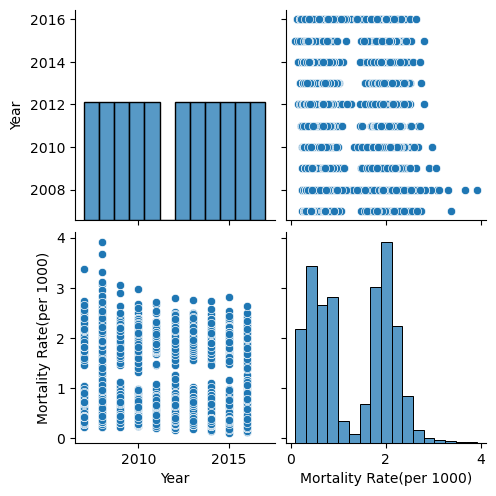

In [13]:
#Visualize the data using seaborn to get an idea of how the pop_data looks like (check for any outliers)
sns.pairplot(pop_data);

# Data Cleaning Process¶
This process involved the following steps:-

a) Handling Missing Data

b) Handling Duplicates if any

c) Encoding categorical variables

## Handling Missing Data
I Decided to drop the missing mortality rates for the year 2017, because they are missing for the entire year.

In [14]:
#Dropping missing values of the mortality rate for the year 2017. The whole year is missing the mortality rate values
pop_data = pop_data.dropna(axis = 0)

In [15]:
#Checking number of observations in the pop_data dataset after dropping the missing mortality rate observations
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1720 entries, 0 to 1890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           1720 non-null   object 
 1   Area of Residence         1720 non-null   object 
 2   ICD 10 Diagnostic Group   1720 non-null   object 
 3   Year                      1720 non-null   int64  
 4   UNIT                      1720 non-null   object 
 5   Mortality Rate(per 1000)  1720 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 94.1+ KB


In [16]:
#reset the index of the pop_data dataset after dropping 172 missing observations and check if they have been dropped
pop_data = pop_data.reset_index(drop=True)
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           1720 non-null   object 
 1   Area of Residence         1720 non-null   object 
 2   ICD 10 Diagnostic Group   1720 non-null   object 
 3   Year                      1720 non-null   int64  
 4   UNIT                      1720 non-null   object 
 5   Mortality Rate(per 1000)  1720 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 80.8+ KB


In [17]:
#check if there is any missing values after dropping the ones that were missing
pop_data.isnull().values.any()

False

## Handling Variables that will not be used
I dropped variables that i'll not use

In [18]:
#Drop variables that i will not use.
pop_data = pop_data.drop([ 'Statistic Label','UNIT'], axis =1)

In [19]:
#View the pop_data dataset after dropping the variables i'll not use
pop_data

,Area of Residence,ICD 10 Diagnostic Group,Year,Mortality Rate(per 1000)
0,State,Neoplasms,2007,1.87
1,State,Neoplasms,2008,1.90
2,State,Neoplasms,2009,1.91
3,State,Neoplasms,2010,1.83
4,State,Neoplasms,2011,1.94
...,...,...,...,...
1715,South-West,External causes of injury and poisoning,2012,0.41
1716,South-West,External causes of injury and poisoning,2013,0.35
1717,South-West,External causes of injury and poisoning,2014,0.39
1718,South-West,External causes of injury and poisoning,2015,0.36


In [20]:
#View the pop_data dataset shape after dropping some variables and observations
pop_data.shape

(1720, 4)

In [21]:
#View the data type of the variables in the pop_data dataset
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1720 non-null   object 
 1   ICD 10 Diagnostic Group   1720 non-null   object 
 2   Year                      1720 non-null   int64  
 3   Mortality Rate(per 1000)  1720 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 53.9+ KB


# Data Visualization after Data Cleaning

For Data Visualization these are some of the questions i was trying to answer.
1. Which year had the highest mortality rate for each disease?
2. Which area had the highest mortality rate for each disease?
3. What is the mortality trend of each disease over the years?

### 1. Which year had the highest mortality rate for each disease?

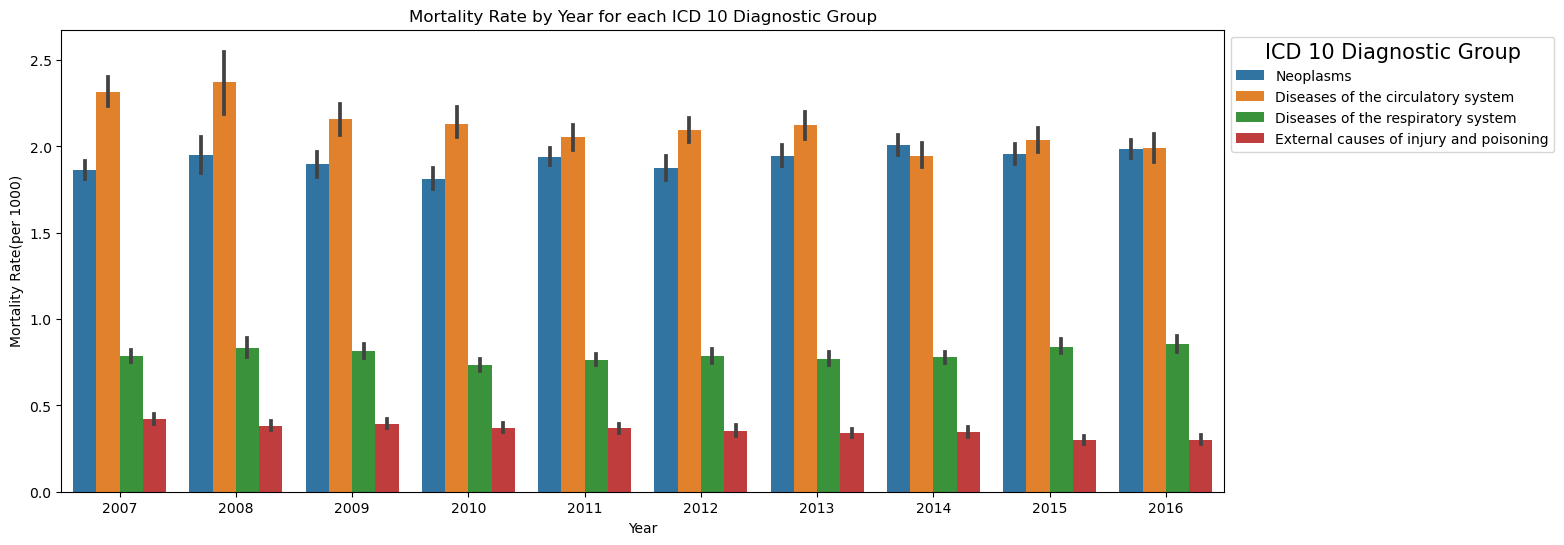

In [22]:
# Visualize the mortality rate of each ICD 10 Diagnostic group for each year using barplots
plt.figure(figsize=(15, 6))
sns.barplot(x="Year", y="Mortality Rate(per 1000)", hue="ICD 10 Diagnostic Group", data=pop_data)
plt.title('Mortality Rate by Year for each ICD 10 Diagnostic Group')
plt.legend(title='ICD 10 Diagnostic Group', title_fontsize='15', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 2. What is the mortality trend of each disease over the years?

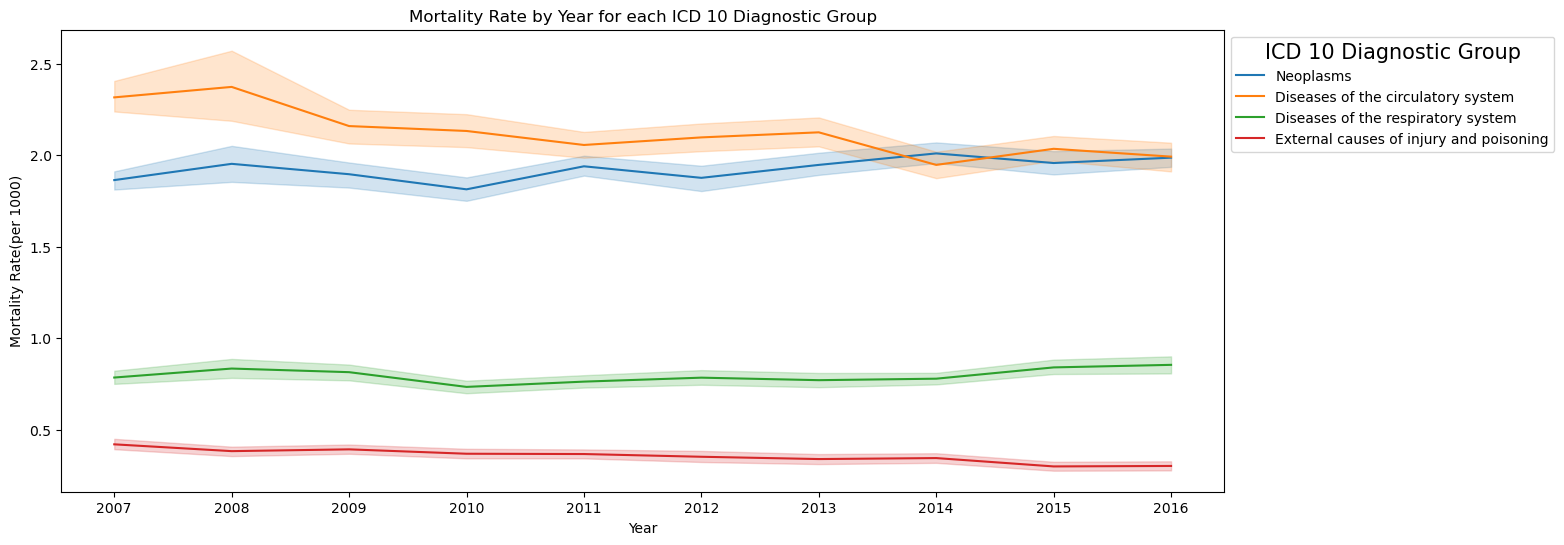

In [23]:
#Visualize the mortality rate trend of each ICD 10 Diagnostic Group over the years using line plots
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x="Year", y="Mortality Rate(per 1000)", hue="ICD 10 Diagnostic Group", data=pop_data)
plt.title('Mortality Rate by Year for each ICD 10 Diagnostic Group')
plt.legend(title='ICD 10 Diagnostic Group', title_fontsize='15', loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xticks(pop_data['Year'].unique())

plt.show()


### 3. What is the mortality rate for each ICD 10 Diagnostic group by Area of Residence

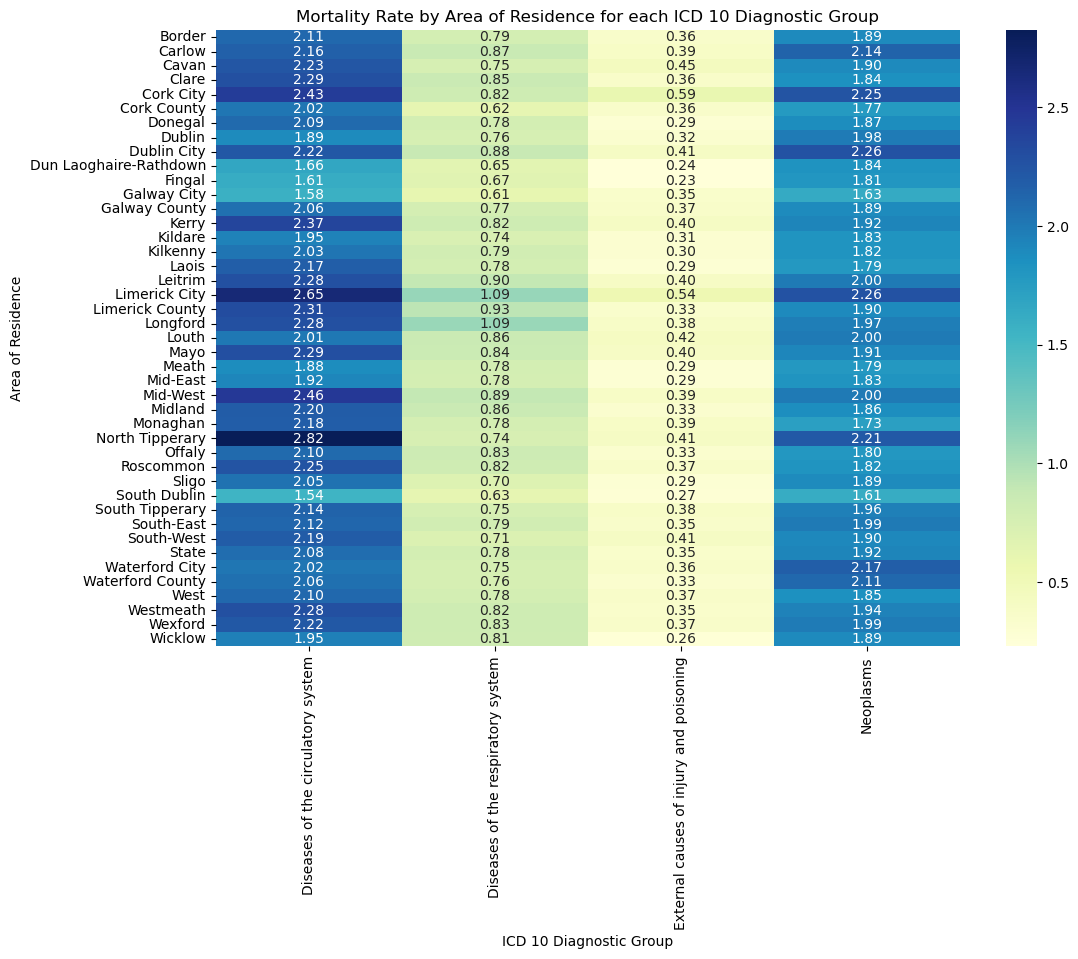

In [24]:
# Visualize the mortality rate of each ICD 10 Diagnostic group for each area of residence using a heatmap
# Create a pivot table for the Area of residence and ICD Diagnostic group
pivot_data = pop_data.pivot_table(index='Area of Residence', columns='ICD 10 Diagnostic Group', values='Mortality Rate(per 1000)')

# Create the heatmap from the pivot_data
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Mortality Rate by Area of Residence for each ICD 10 Diagnostic Group')
plt.show()

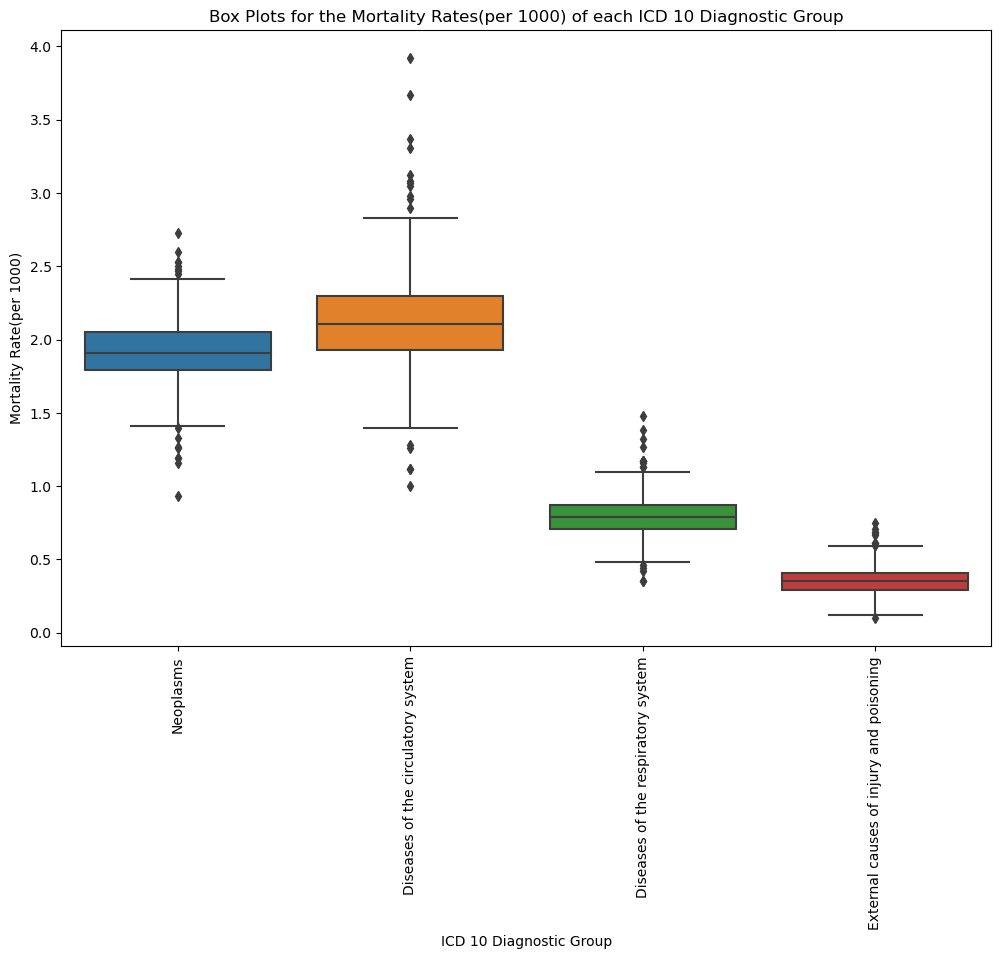

In [25]:
#Visualize the mortality rate of each ICD 10 Diagnostic Group using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='ICD 10 Diagnostic Group', y='Mortality Rate(per 1000)', data=pop_data)
plt.xticks(rotation=90)
plt.xlabel('ICD 10 Diagnostic Group')
plt.ylabel('Mortality Rate(per 1000)')
plt.title('Box Plots for the Mortality Rates(per 1000) of each ICD 10 Diagnostic Group')

plt.show()


### Findings
The four diseases have outliers, with neoplasm having more outliers than the others

<Axes: >

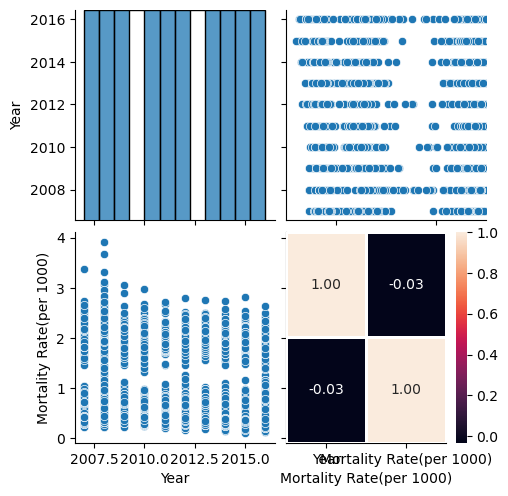

In [26]:
#Visualize the entire pop_data using pairplot
sns.pairplot(pop_data)
sns.heatmap(pop_data.corr(), annot = True, fmt = '.2f', linewidths = 2)

# STATISTICAL ANALYSIS
This process involved:-

a) Determining which data analysis and anaytics i performed (Descriptive, Diagnostic, Predictive, and Prescriptive). 

For this data:-
- I used descriptive analysis and anaytics to understand what happened. 
- I used Predictive analysis and analytics to make prediction of the Mortality rate of each ICD Diagnostic group Variable

b) Assess the levels of data measurements of the variables

c) Calculating the measures of central tendecies and dispersion ( mean, median, IQR ranges, frequency)

d) calculating the measures of dispersion
- coefficient of variation
- variance and standard deviation of grouped data
- check for skewness
- coefficient of skewness
- kurtosis
- coefficient of variation
- box plot

e) Testing various probabilities.(PMF, CDF)

f) Calculate the probability of having a mortality rate of 2.23 if you have neoplasm
- probability distribution of the dataset
- covariance
- correlation coefficient

g) Test the different distributions
- uniform, exponential, normal and stndardized normal (for continous variables)
- poison, hypergeometric, bernoulli, binomial (for discrete variables

h) perform inferential statistics
- Test a hypothesis
- perform a chi-square/ t-test distribution

## Calculating the Measures of Central Tendencies and Measures of Dispersion
1. I deteremined the measures of central tendencies and dispersion (mean, median, variance, SD, Frequency, the quantiles) of mortality rate by various variables

### 1. What are the measures of central tendency and dispersion of mortality rate for each ICD Diagnostic group?

In [27]:
# The measures of central tendency of mortality rate by the ICD 10 Diagnostic Group (code)
diagnostic_mortality = pop_data.groupby('ICD 10 Diagnostic Group')['Mortality Rate(per 1000)'].agg(Frequency = 'count',
    mean='mean',
    variance='var',
    SD='std',
    minimum='min',
    q25=lambda x: x.quantile(0.25),
    q50=lambda x: x.quantile(0.5),
    q75=lambda x: x.quantile(0.75),
    maximum='max').reset_index()

# Rename the columns of each measure of central tendency/dispersion
diagnostic_mortality.columns = ['ICD 10 Diagnostic Group','Frequency', 'Mean', 'Variance', 'Std Deviation','Minimum' ,'Q1', 'Q2 (Median)', 'Q3','Maximum']
diagnostic_mortality

,ICD 10 Diagnostic Group,Frequency,Mean,Variance,Std Deviation,Minimum,Q1,Q2 (Median),Q3,Maximum
0,Diseases of the circulatory system,430,2.122977,0.116794,0.341752,1.00,1.93,2.105,2.30,3.92
1,Diseases of the respiratory system,430,0.795930,0.019615,0.140053,0.35,0.71,0.790,0.87,1.48
2,External causes of injury and poisoning,430,0.357093,0.009366,0.096776,0.10,0.29,0.350,0.41,0.75
3,Neoplasms,430,1.924000,0.052736,0.229644,0.93,1.79,1.910,2.05,2.73


### 2. What are the measures of central tendency and dispersion for mortality rate for each ICD Diagnostic group for each year?

In [28]:
#Calculate the measures of central tendencies for mortality rates for each ICD 10 Diagnostic group
year_mortality = pop_data.groupby(['Year', 'ICD 10 Diagnostic Group'])['Mortality Rate(per 1000)'].agg(Frequency = 'count',
    mean='mean',
    variance='var',
    SD='std',
    minimum='min',
    q25=lambda x: x.quantile(0.25),
    q50=lambda x: x.quantile(0.5),
    q75=lambda x: x.quantile(0.75),
    maximum='max').reset_index()

# Rename the columns appropriately
year_mortality.columns = ['Year','ICD 10 Diagnostic Group','Frequency', 'Mean', 'Variance', 'Std Deviation','Minimum' ,'Q1', 'Q2 (Median)', 'Q3','Maximum']
year_mortality

,Year,ICD 10 Diagnostic Group,Frequency,Mean,Variance,Std Deviation,Minimum,Q1,Q2 (Median),Q3,Maximum
0,2007,Diseases of the circulatory system,43,2.315581,0.082825,0.287794,1.68,2.165,2.30,2.480,3.37
1,2007,Diseases of the respiratory system,43,0.785116,0.014383,0.119928,0.54,0.710,0.78,0.880,1.05
2,2007,External causes of injury and poisoning,43,0.420233,0.009536,0.097651,0.23,0.340,0.41,0.470,0.69
3,2007,Neoplasms,43,1.863721,0.029133,0.170685,1.47,1.755,1.86,1.940,2.34
4,2008,Diseases of the circulatory system,43,2.372791,0.373297,0.610980,1.00,2.085,2.42,2.685,3.92
5,2008,Diseases of the respiratory system,43,0.834186,0.034244,0.185051,0.35,0.770,0.82,0.950,1.32
6,2008,External causes of injury and poisoning,43,0.383023,0.007355,0.085761,0.23,0.330,0.39,0.420,0.60
7,2008,Neoplasms,43,1.952558,0.126239,0.355301,1.16,1.760,2.00,2.150,2.60
8,2009,Diseases of the circulatory system,43,2.158837,0.098625,0.314046,1.12,2.050,2.15,2.280,3.05
9,2009,Diseases of the respiratory system,43,0.814419,0.021744,0.147459,0.35,0.730,0.83,0.895,1.13


### Plot the mean mortality rate by year for each ICD 10 Diagnostic group

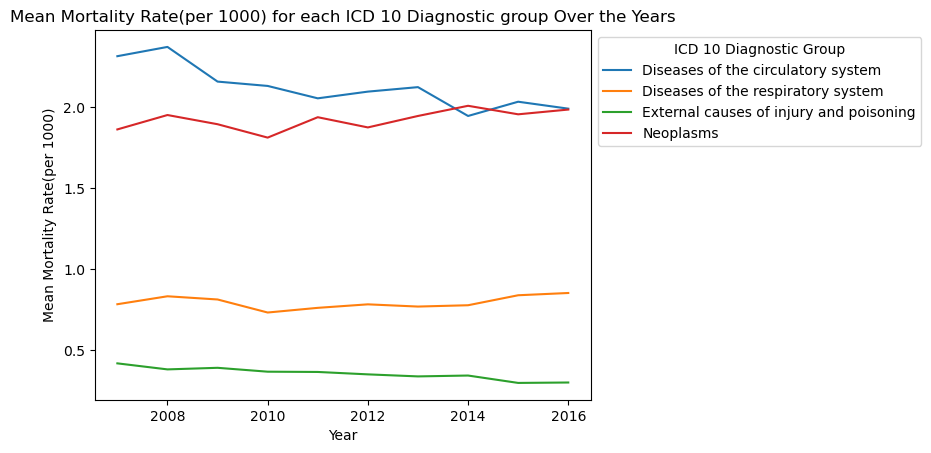

In [29]:
# Group the year_mortality data by ICD 10 diagnostic group and obtain the mean mortality rate for each diagnostic group over the years
diagnosis_data = year_mortality.groupby('ICD 10 Diagnostic Group')

# Iterate through each ICD 10 diagnostic group and create a line chart
for diagnosis, group_data in diagnosis_data:
    plt.plot(group_data['Year'], group_data['Mean'], label=diagnosis)
plt.xlabel('Year')
plt.ylabel('Mean Mortality Rate(per 1000)')
plt.title('Mean Mortality Rate(per 1000) for each ICD 10 Diagnostic group Over the Years')
plt.legend(title='ICD 10 Diagnostic Group', title_fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


### 3. What are the measures of central tendency and dispersion for the mortality rate for each ICD Diagnostic group over the years?

In [30]:
# Create a list of the ICD 10 Diagnostic group and  call it disease
diseases = ['Diseases of the circulatory system	', 'Neoplasms', 'External causes of injury and poisoning', 'Diseases of the respiratory system']

#make the disease list a Pandas DataFrame
disease_measures = pd.DataFrame()

#Create a for loop for seleceting each disease in the disease list
for disease in diseases:
    # Filter from the pop_data the column that has values that match those in the disease list
    filtered_data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease]
    
    # Calculate the measures of central tendency/dispersion of the 'Mortality Rate'
    measures = filtered_data.groupby(['Year'])['Mortality Rate(per 1000)'].agg(Frequency = 'count',
    mean='mean',
    variance='var',
    SD='std',
    minimum='min',
    Q1=lambda x: x.quantile(0.25),
    Q2_Median=lambda x: x.quantile(0.5),
    Q3=lambda x: x.quantile(0.75),
    maximum='max').reset_index()

    
    #concantenate the disease measures to the measures dataframe
    measures['ICD 10 Diagnostic Group'] = disease
    disease_measures = pd.concat([disease_measures, measures])

#View the disease dataframe
disease_measures

,Year,Frequency,mean,variance,SD,minimum,Q1,Q2_Median,Q3,maximum,ICD 10 Diagnostic Group
0,2007,43,1.863721,0.029133,0.170685,1.47,1.755,1.86,1.940,2.34,Neoplasms
1,2008,43,1.952558,0.126239,0.355301,1.16,1.760,2.00,2.150,2.60,Neoplasms
2,2009,43,1.895814,0.057553,0.239903,0.93,1.785,1.92,2.035,2.32,Neoplasms
3,2010,43,1.813256,0.048708,0.220699,1.33,1.690,1.79,1.930,2.40,Neoplasms
4,2011,43,1.939070,0.032490,0.180249,1.68,1.820,1.89,2.030,2.50,Neoplasms
5,2012,43,1.876047,0.054353,0.233137,1.19,1.780,1.89,2.000,2.45,Neoplasms
6,2013,43,1.946744,0.040489,0.201219,1.57,1.810,1.95,2.055,2.40,Neoplasms
7,2014,43,2.009535,0.040605,0.201506,1.69,1.880,1.97,2.065,2.73,Neoplasms
8,2015,43,1.956977,0.044426,0.210776,1.55,1.820,1.94,2.035,2.53,Neoplasms
9,2016,43,1.986279,0.031052,0.176217,1.59,1.880,2.00,2.085,2.41,Neoplasms


### 4. What are the measures of central tendency and dispersion for the mortality rate for each ICD Diagnostic group by area of residence?

In [31]:
#The measures of central tendency and dispersion of the mortality rate by Area of residence(code)
area_measures = pop_data.groupby(['Area of Residence'])['Mortality Rate(per 1000)'].agg(Frequency = 'count',
    mean='mean',
    variance='var',
    SD='std',
    minimum='min',
    Q1=lambda x: x.quantile(0.25),
    Q2_Median=lambda x: x.quantile(0.5),
    Q3=lambda x: x.quantile(0.75),
    maximum='max').reset_index()
area_measures

,Area of Residence,Frequency,mean,variance,SD,minimum,Q1,Q2_Median,Q3,maximum
0,Border,40,1.28800,0.562063,0.749708,0.29,0.6225,1.370,1.9625,2.49
1,Carlow,40,1.38925,0.662581,0.813991,0.28,0.7050,1.370,2.1175,2.90
2,Cavan,40,1.33250,0.599855,0.774503,0.29,0.6000,1.265,2.0525,2.54
3,Clare,40,1.33600,0.618881,0.786690,0.30,0.6200,1.345,2.0650,2.51
4,Cork City,40,1.52475,0.720338,0.848728,0.44,0.7350,1.490,2.2950,3.08
5,Cork County,40,1.19475,0.529379,0.727585,0.31,0.4650,1.195,1.8800,2.20
6,Donegal,40,1.26000,0.588251,0.766975,0.24,0.5750,1.390,1.9675,2.44
7,Dublin,40,1.23750,0.535604,0.731850,0.19,0.6250,1.260,1.9450,2.16
8,Dublin City,40,1.44300,0.696904,0.834808,0.25,0.7025,1.490,2.2325,2.63
9,Dun Laoghaire-Rathdown,40,1.09650,0.478890,0.692019,0.10,0.5325,1.150,1.7425,2.11


## Coefficient of Variation 

In [32]:
# Calculate the coefficient of variation (CV) of mortality rate for each ICD 10 diagnostic group using the year_mortality data
year_mortality['Coefficient of Variation'] = (year_mortality['Std Deviation'] / year_mortality['Mean']) * 100

# Group the year_mortality data by ICD 10 Diagnostic group
diagnosis_data = year_mortality.groupby('ICD 10 Diagnostic Group')

# Iterate through each ICD 10 diagnostic group
for diagnosis, group_data in diagnosis_data:
    cv = group_data['Coefficient of Variation'].iloc[0]
    print(f'Diagnosis: {diagnosis}, Coefficient of Variation: {cv:.2f}%')


Diagnosis: Diseases of the circulatory system, Coefficient of Variation: 12.43%
Diagnosis: Diseases of the respiratory system, Coefficient of Variation: 15.28%
Diagnosis: External causes of injury and poisoning, Coefficient of Variation: 23.24%
Diagnosis: Neoplasms, Coefficient of Variation: 9.16%


## A Density Distribution for Mortality rate against the ICD 10 Diagnostic group 

Text(0.5, 0, 'Mortality Rate(per 1000)')

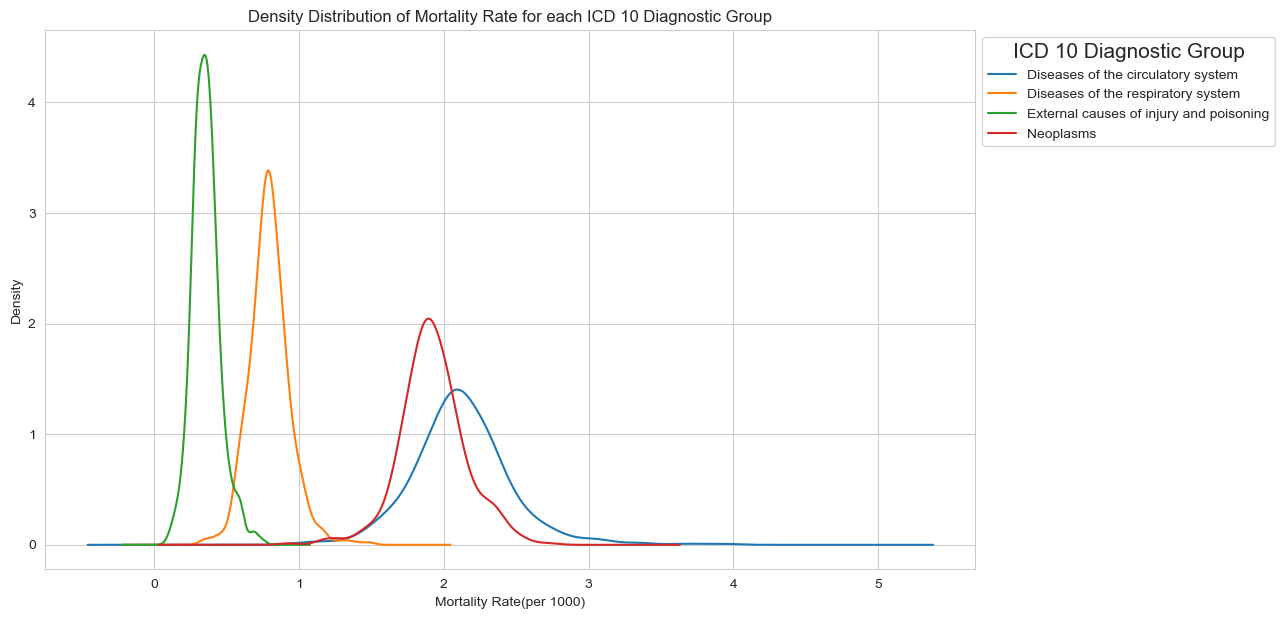

In [33]:
# Sort the pop_data by year and ICD 10 Diagnostic Group in ascending order
pop_data_sorted = pop_data.sort_values(by=['Year','ICD 10 Diagnostic Group'])

# Plot distribution of Mortality Rate(per 1000) by ICD 10 Diagnostic Group
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
pop_data_sorted.groupby('ICD 10 Diagnostic Group')['Mortality Rate(per 1000)'].plot(kind='kde')
plt.title('Density Distribution of Mortality Rate for each ICD 10 Diagnostic Group')
plt.legend(title='ICD 10 Diagnostic Group', title_fontsize='15', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Mortality Rate(per 1000)') 

## Histogram for Mortality Rates of Each ICD Diagnostic group

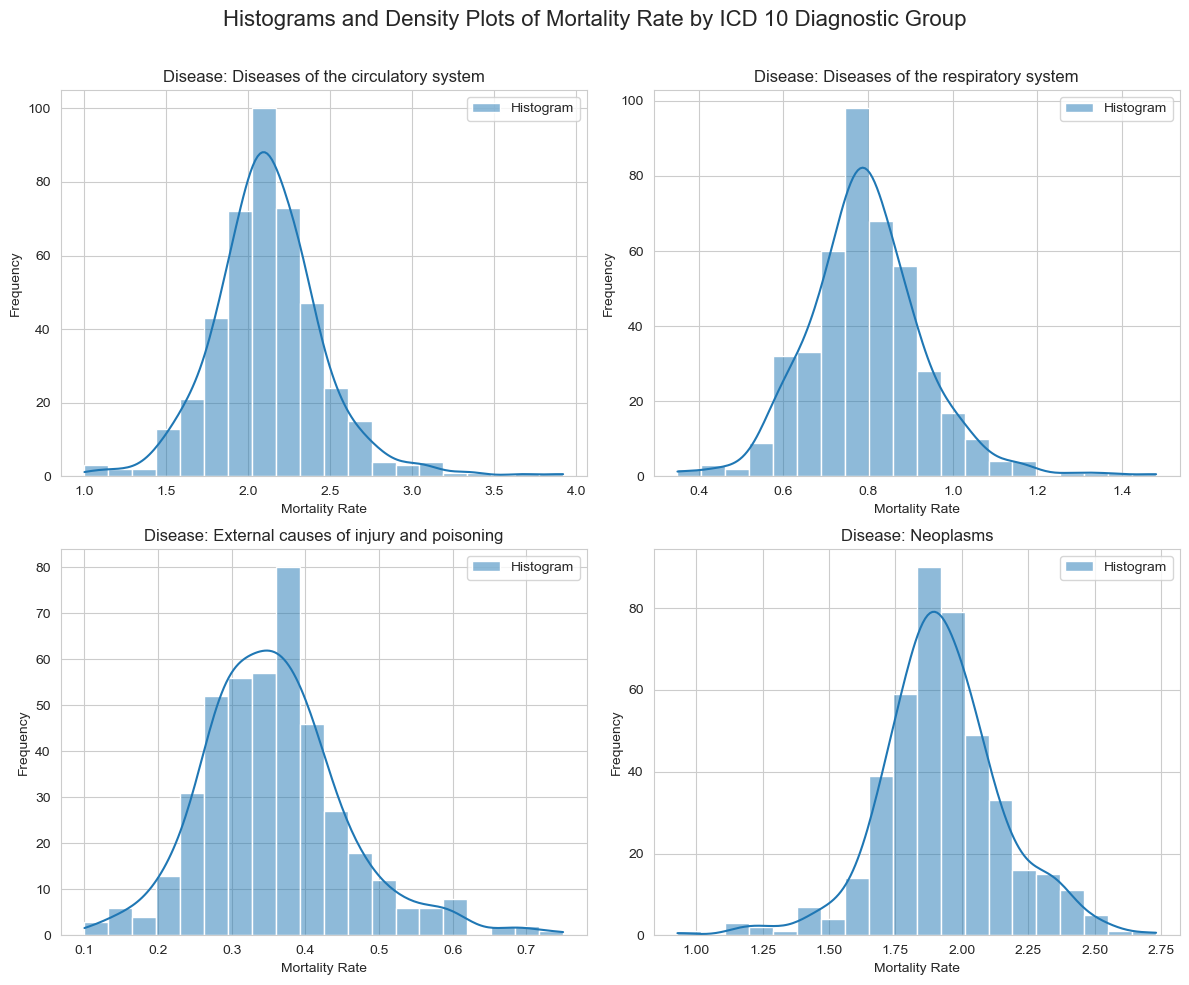

In [34]:
# Group the pop_data by ICD 10 Diagnostic Group
grouped_data = pop_data_sorted.groupby('ICD 10 Diagnostic Group')

# Create a figure with subplots for the ICD 10 Diagnostic group
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histograms and Density Plots of Mortality Rate by ICD 10 Diagnostic Group', fontsize=16)

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Plot histograms and density plots for each disease
for i, (diagnosis, group_data) in enumerate(grouped_data):
    ax = axes[i]

    # Plot the histogram
    sns.histplot(group_data['Mortality Rate(per 1000)'], bins=20, ax=ax, kde=True, label='Histogram')
    ax.set_title(f'Disease: {diagnosis}')
    ax.set_xlabel('Mortality Rate')
    ax.set_ylabel('Frequency')
    ax.legend()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


## Skewness and Kurtosis

In [35]:
#Import functions that calculate skewness and kurtosis 
from scipy.stats import skew, kurtosis

# Group pop_data by ICD 10 Diagnostic Group
grouped_data = pop_data.groupby('ICD 10 Diagnostic Group')

# Initialize the lists that will store skewness and kurtosis values
skewness_values = []
kurtosis_values = []

# Calculate the skewness and kurtosis for each ICD 10 Diagnostic group
for diagnosis, group_data in grouped_data:
    skewness = skew(group_data['Mortality Rate(per 1000)'], bias=False)
    kurt = kurtosis(group_data['Mortality Rate(per 1000)'], bias=False)
    skewness_values.append((diagnosis, skewness))
    kurtosis_values.append((diagnosis, kurt))

# Create DataFrames to store the results
skewness_data = pd.DataFrame(skewness_values, columns=['ICD 10 Diagnostic Group', 'Skewness'])
kurtosis_data = pd.DataFrame(kurtosis_values, columns=['ICD 10 Diagnostic Group', 'Kurtosis'])

# Print or further analyze the skewness and kurtosis for each disease
print("Skewness:")
print(skewness_data)

print("\nKurtosis:")
print(kurtosis_data)

Skewness:
                   ICD 10 Diagnostic Group  Skewness
0       Diseases of the circulatory system  0.724960
1       Diseases of the respiratory system  0.597634
2  External causes of injury and poisoning  0.693595
3                                Neoplasms -0.089010

Kurtosis:
                   ICD 10 Diagnostic Group  Kurtosis
0       Diseases of the circulatory system  3.384013
1       Diseases of the respiratory system  2.510226
2  External causes of injury and poisoning  1.430687
3                                Neoplasms  1.662338


# Probability Mass Function
I plotted PMF curves for the dicrete variables

### PMF of ICD Diagnostic Group

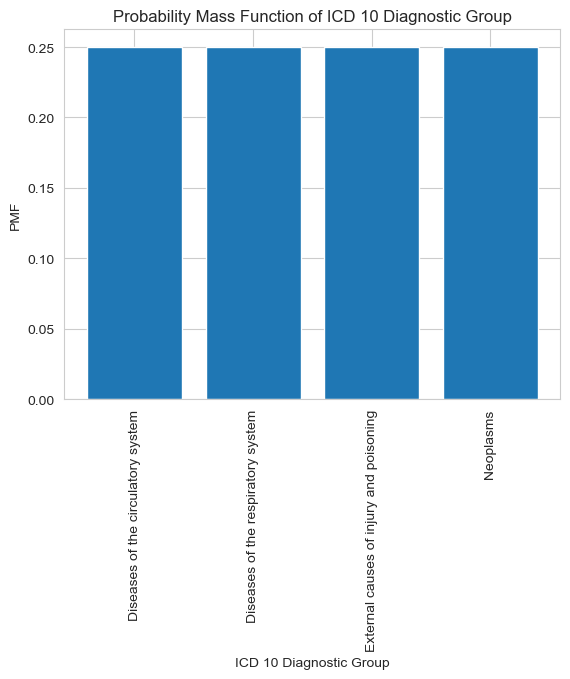

In [36]:
#Import the library for PMF
from empiricaldist import Pmf

# Create a PMF from the ICD 10 Diagnostic Group Variable
pmf = Pmf.from_seq(pop_data['ICD 10 Diagnostic Group'])

# Create a bar plot for the PMF
pmf.bar()
plt.xticks(rotation=90)
plt.xlabel('ICD 10 Diagnostic Group')
plt.ylabel('PMF')
plt.title('Probability Mass Function of ICD 10 Diagnostic Group')
plt.show()


### PMF for Area of Residence

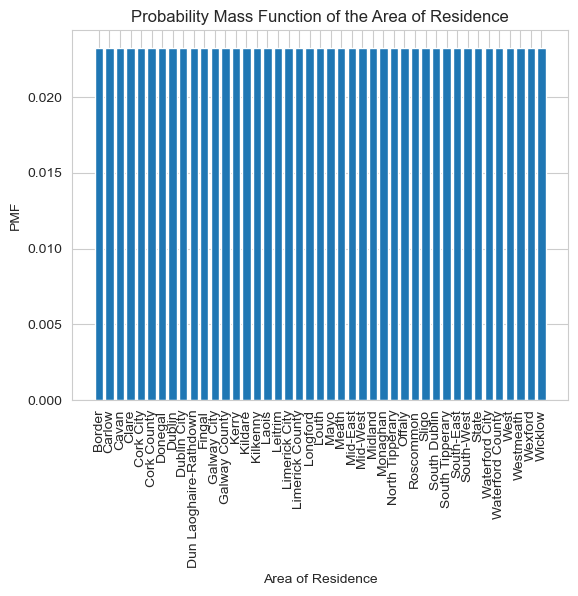

In [37]:
#Import the library for PMF
from empiricaldist import Pmf

# Create a PMF from the Area of Residence Group Variable
pmf = Pmf.from_seq(pop_data['Area of Residence'])

# Create a bar plot for the PMF
pmf.bar()
plt.xticks(rotation=90)
plt.xlabel('Area of Residence')
plt.ylabel('PMF')
plt.title('Probability Mass Function of the Area of Residence')
plt.show()


# Cummulative Density Function

### CDF for Mortality rate variable for each ICD Diagnostic Group

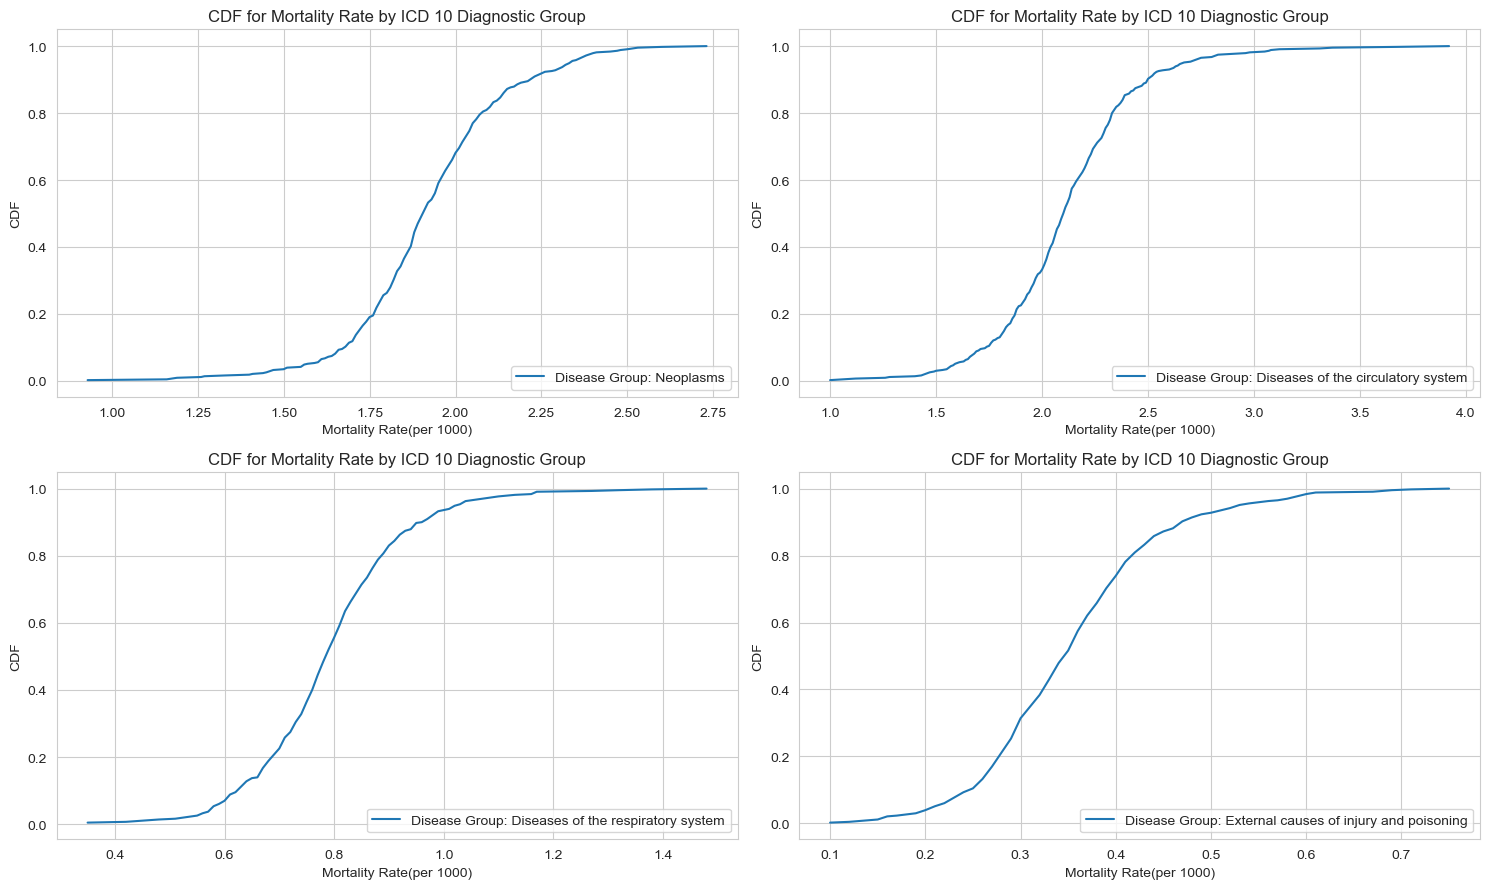

In [38]:
#Import the CDF library
from empiricaldist import Cdf

#Create a dataframe for the unique diseases in the ICD Diagnostic group in pop_data
disease_groups = pop_data['ICD 10 Diagnostic Group'].unique()

#Plot the CDF curves for each ICD Diagnostic Group (disease) mortality rates
plt.figure(figsize=(15, 9))
for i, disease_group in enumerate(disease_groups):
    plt.subplot(2, 2, i + 1) 
    data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease_group]['Mortality Rate(per 1000)']
    cdf = Cdf.from_seq(data)
    cdf.plot(label=f'Disease Group: {disease_group}')
    plt.xlabel('Mortality Rate(per 1000)')
    plt.ylabel('CDF')
    title_text = f'CDF for Mortality Rate by ICD 10 Diagnostic Group'
    plt.title(title_text)
    plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### CDF for year for each ICD 10 Diagnostic group

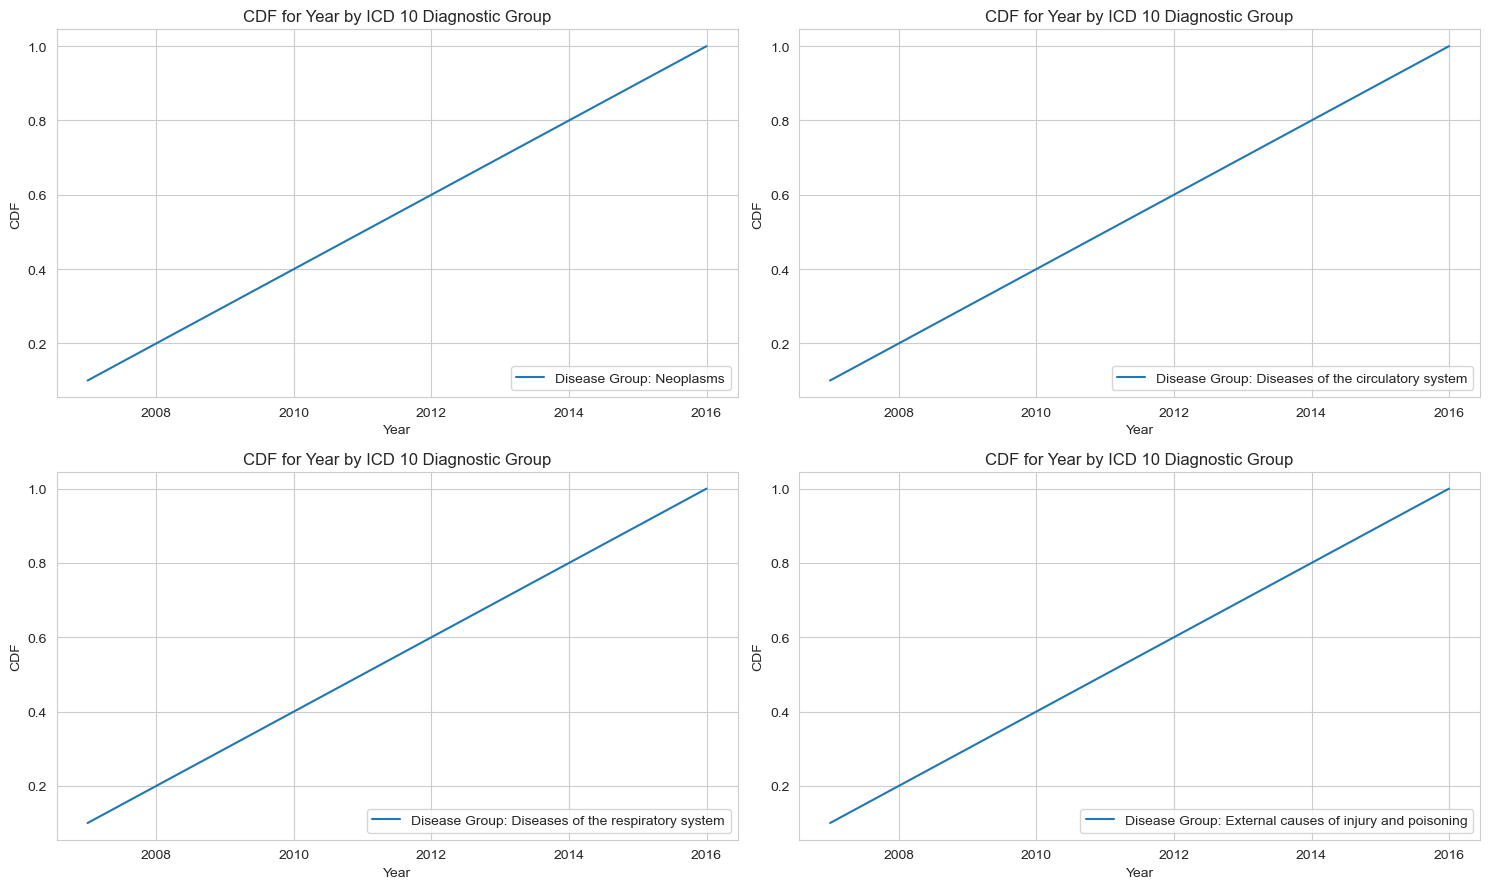

In [39]:
#Import the CDF library
from empiricaldist import Cdf

#Create a dataframe for the unique diseases in the ICD Diagnostic group in pop_data
disease_groups = pop_data['ICD 10 Diagnostic Group'].unique()

#Plot the CDF curves for each ICD Diagnostic Group (disease) by year
plt.figure(figsize=(15, 9))
for i, disease_group in enumerate(disease_groups):
    plt.subplot(2, 2, i + 1) 
    data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease_group]['Year']
    cdf = Cdf.from_seq(data)
    cdf.plot(label=f'Disease Group: {disease_group}')
    plt.xlabel('Year')
    plt.ylabel('CDF')
    title_text = f'CDF for Year by ICD 10 Diagnostic Group'
    plt.title(title_text)
    plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Normality Test of the Variables
There are various normality tests one can perform to determine if a variable is normally distributed. These include:-
- Plotting histograms/Q-Q plots/normal probability plots
- calculating using statistical techniques such as Perform a Shapiro-Wilk Test, If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.
- Perform a Kolmogorov-Smirnov Test, If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.

### Normality test using Q-Q Plots

### Q-Q Plots for Mortality rate for each ICD Diagnostic group

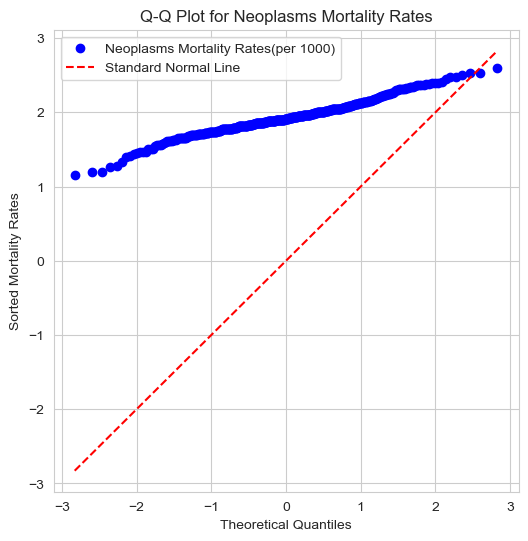

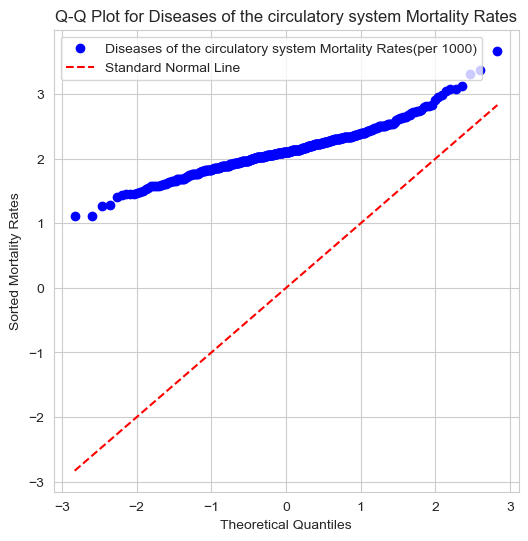

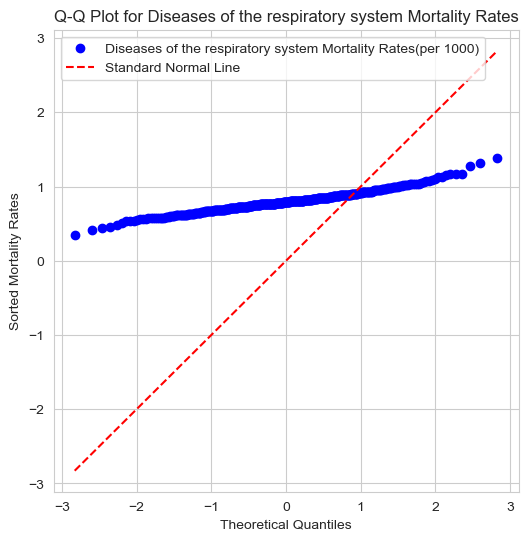

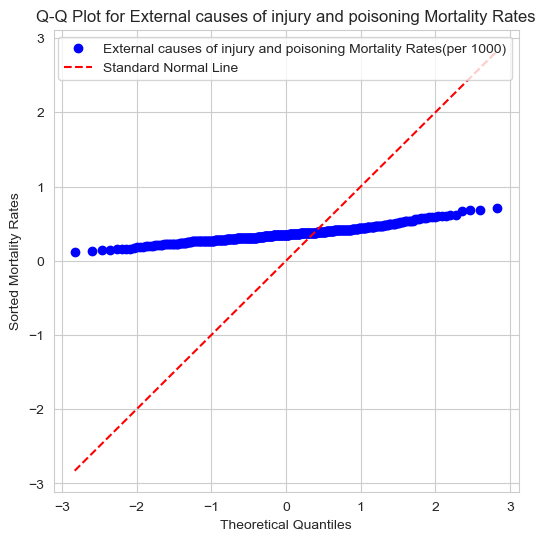

In [40]:
import scipy.stats as stats
#Make the ICD Diagnostic group a list of unique diseases
unique_diseases = pop_data['ICD 10 Diagnostic Group'].unique()

# Create a Q-Q plot for each disease
for disease in unique_diseases:
    disease_data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease]['Mortality Rate(per 1000)']
    
    # Sort the mortality rates
    sorted_mortality_rates = np.sort(disease_data)
    
    # Generate theoretical quantiles for a standard normal distribution
    theoretical_quantiles = stats.norm.ppf(np.linspace(0, 1, len(sorted_mortality_rates)))
    
    # Create a Q-Q plot
    plt.figure(figsize=(6, 6))
    plt.scatter(theoretical_quantiles, sorted_mortality_rates, c='b', marker='o', label=f'{disease} Mortality Rates(per 1000)')
    
    # Add the standard normal line in the plot
    plt.plot(theoretical_quantiles, theoretical_quantiles, 'r--', label='Standard Normal Line')
    
    #Labelling the plots
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sorted Mortality Rates')
    plt.title(f'Q-Q Plot for {disease} Mortality Rates')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


### Q-Q Plots for Year for each ICD Diagnostic group

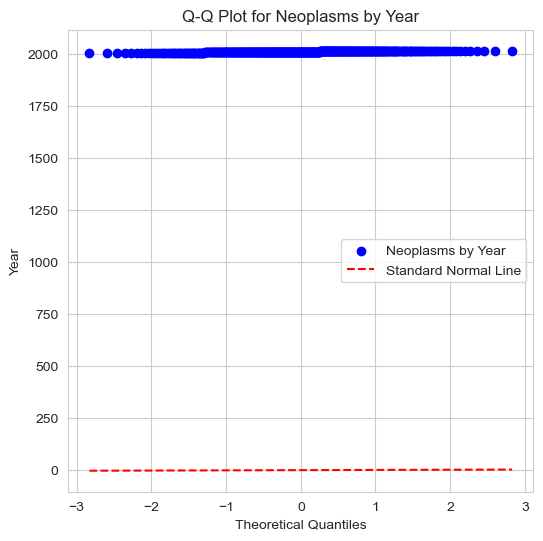

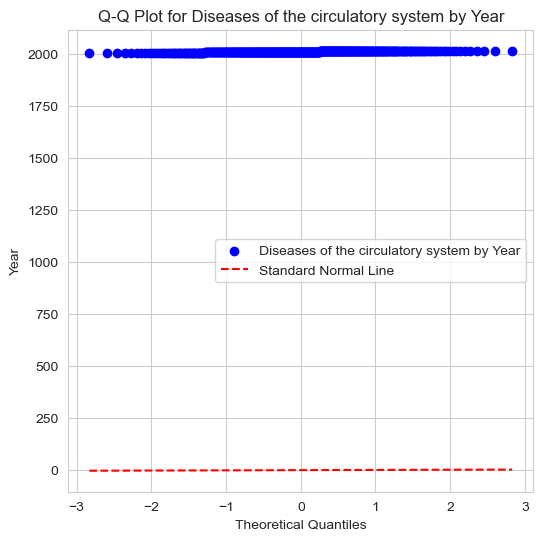

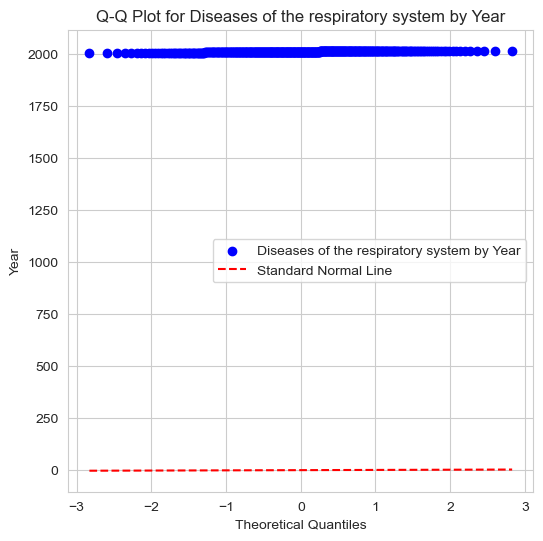

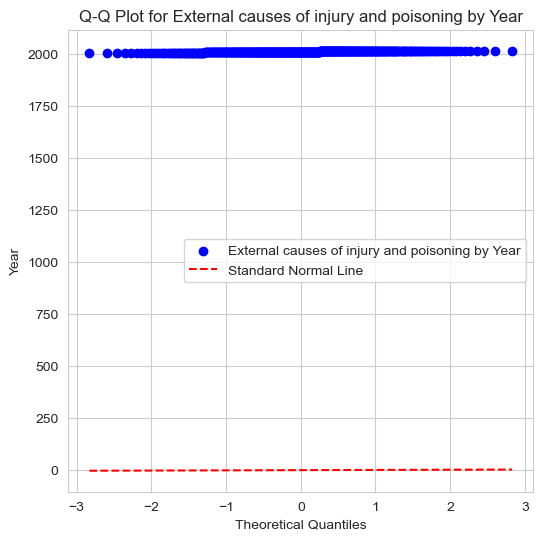

In [41]:
import scipy.stats as stats
#Make the ICD Diagnostic group a list of unique diseases
unique_diseases = pop_data['ICD 10 Diagnostic Group'].unique()

# Create a Q-Q plot for each disease
for disease in unique_diseases:
    disease_data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease]['Year']
    
    # Sort the Year
    sorted_year = np.sort(disease_data)
    
    # Generate theoretical quantiles for a standard normal distribution
    theoretical_quantiles = stats.norm.ppf(np.linspace(0, 1, len(sorted_year)))
    
    # Create a Q-Q plot
    plt.figure(figsize=(6, 6))
    plt.scatter(theoretical_quantiles, sorted_year, c='b', marker='o', label=f'{disease} by Year')
    
    # Add the standard normal line in the plot
    plt.plot(theoretical_quantiles, theoretical_quantiles, 'r--', label='Standard Normal Line')
    
    
    #Labelling the plots
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Year')
    plt.title(f'Q-Q Plot for {disease} by Year')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

### Normality Test using Shapiro-wilk Test

In [42]:
#Shapiro-wilk test for the Mortality Rate(per 1000)
#Import the shapiro function
from scipy.stats import shapiro 
shapiro(pop_data['Mortality Rate(per 1000)'])

ShapiroResult(statistic=0.8989815711975098, pvalue=3.1720127309764017e-32)

### Shapiro-wilk test for mortality rate for each ICD Diagnostic Group
Set the hypothesis to test:

H0: The Mortality rate variable for each disease does not follow a normal distribution

H1: The mortality rate variable for each disease follows a normal distribution

In [43]:
# Perform Shapiro-Wilk test for mortality rate each ICD Diagnostic Group
for disease in unique_diseases:
    disease_data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease]['Mortality Rate(per 1000)']
    
    # Perform Shapiro-Wilk test for the current disease group
    stat, p_value = shapiro(disease_data)
    
    # Print the results
    print(f'Disease: {disease}')
    print(f'Shapiro-Wilk Statistic: {stat}')
    print(f'p-value: {p_value}')
    
    # add a significance level threshold and then intepret the results
    if p_value < 0.05:
        print("The Mortality rate variable follow a normal distribution (reject H0)")
    else:
        print("The Mortality rate variable does not follows a normal distribution (fail to reject H0)")
    
    print('\n')


Disease: Neoplasms
Shapiro-Wilk Statistic: 0.97663813829422
p-value: 2.130736902472563e-06
The Mortality rate variable follow a normal distribution (reject H0)


Disease: Diseases of the circulatory system
Shapiro-Wilk Statistic: 0.9558820128440857
p-value: 4.796656960515122e-10
The Mortality rate variable follow a normal distribution (reject H0)


Disease: Diseases of the respiratory system
Shapiro-Wilk Statistic: 0.9677072167396545
p-value: 3.9128494222495647e-08
The Mortality rate variable follow a normal distribution (reject H0)


Disease: External causes of injury and poisoning
Shapiro-Wilk Statistic: 0.969314455986023
p-value: 7.637074617150574e-08
The Mortality rate variable follow a normal distribution (reject H0)




### Shapiro-wilk test for Year for each ICD Diagnostic Group
Set the hypothesis to test:

H0: The Year variable for each disease does not follow a normal distribution

H1: The Year variable for each disease follows a normal distribution

In [44]:
# Perform Shapiro-Wilk test for each ICD Diagnostic Group
for disease in unique_diseases:
    disease_data = pop_data[pop_data['ICD 10 Diagnostic Group'] == disease]['Year']
    
    # Perform Shapiro-Wilk test for the current disease group
    stat, p_value = shapiro(disease_data)
    
    # Print the results
    print(f'Disease: {disease}')
    print(f'Shapiro-Wilk Statistic: {stat}')
    print(f'p-value: {p_value}')
    
    # add a significance level threshold and then intepret the results
    if p_value < 0.05:
        print("The Year variable follow a normal distribution (reject H0)")
    else:
        print("The Year variable does not follows a normal distribution (fail to reject H0)")
    
    print('\n')


Disease: Neoplasms
Shapiro-Wilk Statistic: 0.935137152671814
p-value: 9.880467754727618e-13
The Year variable follow a normal distribution (reject H0)


Disease: Diseases of the circulatory system
Shapiro-Wilk Statistic: 0.935137152671814
p-value: 9.880467754727618e-13
The Year variable follow a normal distribution (reject H0)


Disease: Diseases of the respiratory system
Shapiro-Wilk Statistic: 0.935137152671814
p-value: 9.880467754727618e-13
The Year variable follow a normal distribution (reject H0)


Disease: External causes of injury and poisoning
Shapiro-Wilk Statistic: 0.935137152671814
p-value: 9.880467754727618e-13
The Year variable follow a normal distribution (reject H0)




## Unifrom Ditribution

## Poison Distribution

## Hypergeometric Distribution

# Inferential Statistics

# MACHINE LEARNING
This process involves:
- Encoding the categorical Variables
- Creating the features and dependent variable objects
- Standardising the data
- splitting the data into training and Test set.
- build various ML models
- test the model on a test data set
- Evaluate the model performance
- Maximize the model performance
- Hyperparameter tuning

## Create the Features (independent variables) and dependent variables objects

In [45]:
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area of Residence         1720 non-null   object 
 1   ICD 10 Diagnostic Group   1720 non-null   object 
 2   Year                      1720 non-null   int64  
 3   Mortality Rate(per 1000)  1720 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 53.9+ KB


## Encoding the Features
I used one-hot encoding for the categorical variables, Area of Residence and ICD 10 Diagnostic group. 

one hot encoding does not order the labels

In [46]:
#Encoding the ICD 10 Diagnostic Group Variable
# Import the OneHotEncoder function
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Creating the one-hot-encoder object
Diagnosis_OneHotEncoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding on the ICD Diagnosis Group
encoder_diagnosis = Diagnosis_OneHotEncoder.fit_transform(pop_data[['ICD 10 Diagnostic Group']])

# Convert the one-hot encoded result to a DataFrame
encoder_diagnosis_df = pd.DataFrame(encoder_diagnosis, columns=Diagnosis_OneHotEncoder.get_feature_names_out(['ICD 10 Diagnostic Group']))

# Merge the encoder_diagnosis_df with the pop_data 
pop_data = pd.concat([pop_data, encoder_diagnosis_df], axis=1)

# View the pop_data to check if the two data frames have been merged
pop_data

,Area of Residence,ICD 10 Diagnostic Group,Year,Mortality Rate(per 1000),ICD 10 Diagnostic Group_Diseases of the circulatory system,ICD 10 Diagnostic Group_Diseases of the respiratory system,ICD 10 Diagnostic Group_External causes of injury and poisoning,ICD 10 Diagnostic Group_Neoplasms
0,State,Neoplasms,2007,1.87,0.0,0.0,0.0,1.0
1,State,Neoplasms,2008,1.90,0.0,0.0,0.0,1.0
2,State,Neoplasms,2009,1.91,0.0,0.0,0.0,1.0
3,State,Neoplasms,2010,1.83,0.0,0.0,0.0,1.0
4,State,Neoplasms,2011,1.94,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1715,South-West,External causes of injury and poisoning,2012,0.41,0.0,0.0,1.0,0.0
1716,South-West,External causes of injury and poisoning,2013,0.35,0.0,0.0,1.0,0.0
1717,South-West,External causes of injury and poisoning,2014,0.39,0.0,0.0,1.0,0.0
1718,South-West,External causes of injury and poisoning,2015,0.36,0.0,0.0,1.0,0.0


In [47]:
#Encoding the Area of Residence Variable
# Creating the one-hot-encoder object
area_OneHotEncoder = OneHotEncoder(sparse=False)

# Perform one-hot encoding on the ICD Diagnosis Group
encoder_area = area_OneHotEncoder.fit_transform(pop_data[['Area of Residence']])

# Convert the encoder_area to a DataFrame
encoder_area_df = pd.DataFrame(encoder_area, columns=area_OneHotEncoder.get_feature_names_out(['Area of Residence']))

# Merge the encoder_area_df with the pop_data 
pop_data = pd.concat([pop_data, encoder_area_df], axis=1)

# View the pop_data to check if the two data frames have been merged
pop_data

,Area of Residence,ICD 10 Diagnostic Group,Year,Mortality Rate(per 1000),ICD 10 Diagnostic Group_Diseases of the circulatory system,ICD 10 Diagnostic Group_Diseases of the respiratory system,ICD 10 Diagnostic Group_External causes of injury and poisoning,ICD 10 Diagnostic Group_Neoplasms,Area of Residence_Border,Area of Residence_Carlow,...,Area of Residence_South Tipperary,Area of Residence_South-East,Area of Residence_South-West,Area of Residence_State,Area of Residence_Waterford City,Area of Residence_Waterford County,Area of Residence_West,Area of Residence_Westmeath,Area of Residence_Wexford,Area of Residence_Wicklow
0,State,Neoplasms,2007,1.87,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,State,Neoplasms,2008,1.90,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,State,Neoplasms,2009,1.91,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,State,Neoplasms,2010,1.83,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,State,Neoplasms,2011,1.94,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,South-West,External causes of injury and poisoning,2012,0.41,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1716,South-West,External causes of injury and poisoning,2013,0.35,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1717,South-West,External causes of injury and poisoning,2014,0.39,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1718,South-West,External causes of injury and poisoning,2015,0.36,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 51 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Area of Residence                                                1720 non-null   object 
 1   ICD 10 Diagnostic Group                                          1720 non-null   object 
 2   Year                                                             1720 non-null   int64  
 3   Mortality Rate(per 1000)                                         1720 non-null   float64
 4   ICD 10 Diagnostic Group_Diseases of the circulatory system       1720 non-null   float64
 5   ICD 10 Diagnostic Group_Diseases of the respiratory system       1720 non-null   float64
 6   ICD 10 Diagnostic Group_External causes of injury and poisoning  1720 non-null   float64
 7   ICD 10 Diagnostic Group_Neoplasms         

## Create the Features (independent variables) and dependent variables objects

In [49]:
# Creating the features variables
X = pop_data.drop(["Mortality Rate(per 1000)","Area of Residence", "ICD 10 Diagnostic Group"], axis = 1)
print(X)

      Year  ICD 10 Diagnostic Group_Diseases of the circulatory system  \
0     2007                                                0.0            
1     2008                                                0.0            
2     2009                                                0.0            
3     2010                                                0.0            
4     2011                                                0.0            
...    ...                                                ...            
1715  2012                                                0.0            
1716  2013                                                0.0            
1717  2014                                                0.0            
1718  2015                                                0.0            
1719  2016                                                0.0            

      ICD 10 Diagnostic Group_Diseases of the respiratory system  \
0                                          

In [50]:
#Creating the dependent variable
y = pop_data.iloc[:, 3].values
print(y)

[1.87 1.9  1.91 ... 0.39 0.36 0.38]


Scaling is not necessary in decision trees

## Split the data into training and test set

In [77]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [78]:
print(X_train)

      Year  ICD 10 Diagnostic Group_Diseases of the circulatory system  \
172   2009                                                1.0            
1445  2012                                                0.0            
1652  2009                                                1.0            
1519  2016                                                0.0            
547   2014                                                0.0            
...    ...                                                ...            
360   2007                                                0.0            
709   2016                                                0.0            
439   2016                                                0.0            
174   2011                                                1.0            
1146  2013                                                0.0            

      ICD 10 Diagnostic Group_Diseases of the respiratory system  \
172                                        

In [79]:
X_train.shape

(1204, 48)

In [80]:
print(y_train)

[1.95 1.96 2.14 ... 0.24 1.46 0.58]


In [81]:
y_train.shape

(1204,)

In [82]:
print(X_test)

      Year  ICD 10 Diagnostic Group_Diseases of the circulatory system  \
256   2013                                                1.0            
772   2009                                                1.0            
1567  2014                                                0.0            
1273  2010                                                0.0            
1176  2013                                                1.0            
...    ...                                                ...            
965   2012                                                0.0            
1414  2011                                                1.0            
593   2010                                                0.0            
1483  2010                                                0.0            
322   2009                                                0.0            

      ICD 10 Diagnostic Group_Diseases of the respiratory system  \
256                                        

In [83]:
X_test.shape

(516, 48)

In [59]:
print(y_test)

[1.81 2.42 1.88 0.27 2.33 1.89 2.32 2.34 2.44 0.41 0.82 0.77 0.33 1.96
 0.91 0.27 1.95 2.28 0.59 0.68 0.28 1.81 0.32 1.97 0.7  1.87 1.83 0.42
 2.33 2.38 0.36 0.36 1.97 2.25 2.33 0.36 1.02 0.81 0.79 1.66 0.24 2.55
 2.39 1.78 0.28 2.32 1.04 0.95 0.39 0.27 2.22 2.11 0.81 2.05 2.2  2.7
 0.77 2.13 2.04 0.56 1.88 0.51 0.54 2.11 2.08 1.66 0.78 0.82 0.35 0.81
 0.96 1.86 2.8  0.36 0.99 2.1  2.03 1.98 0.58 0.42 1.97 2.08 0.38 2.06
 0.61 0.88 1.66 0.92 2.33 1.91 2.15 2.5  2.05 0.42 0.98 1.83 2.   0.59
 0.79 1.88 0.89 0.29 0.92 2.14 0.41 2.34 2.03 0.45 0.29 2.15 0.78 0.44
 2.22 1.4  2.03 1.73 2.35 2.31 0.35 2.24 2.15 2.09 0.7  0.76 0.38 0.47
 1.87 0.4  0.35 2.67 2.16 0.29 2.02 2.02 0.6  2.03 0.68 0.67 0.31 0.37
 0.38 0.77 0.68 0.32 0.93 0.71 2.23 0.79 0.36 0.26 1.92 1.81 0.55 2.37
 1.55 1.76 1.58 1.93 0.71 0.91 0.3  2.41 0.3  0.21 0.99 2.1  2.05 2.05
 0.71 0.92 0.95 0.3  0.34 0.8  1.5  0.34 0.82 2.09 0.85 2.1  2.18 1.97
 0.31 0.67 2.5  1.97 0.2  0.86 0.63 0.41 2.04 1.88 2.   0.87 2.22 0.37
 2.04 2

In [60]:
y_test.shape

(516,)

# Try all possible machine learning models because the target variable is continous.
KNN
Decision trees
random forest
linear regression
lasso regression
ridge regression
SVM
Gaussian Naive Bayes

## Decision Tree Regression

## Train the Dataset to create a model

In [75]:
#Import the decision tree regressor function
from sklearn.tree import DecisionTreeRegressor

#Create the Decisicion tree regressor object
decision_Regressor = DecisionTreeRegressor(random_state=0)

#fit the regressor with X and y
decision_Regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

## Test the model on the test dataset

In [76]:
#Predict the test dataset
decision_pred=decision_Regressor.predict(X_test)
decision_pred

array([1.86, 2.96, 1.88, 0.21, 2.18, 1.95, 1.94, 2.73, 2.82, 0.31, 0.8 ,
       0.65, 0.37, 1.88, 0.78, 0.39, 1.87, 2.28, 0.8 , 0.97, 0.41, 1.56,
       0.32, 1.88, 0.68, 1.96, 1.87, 0.34, 2.06, 2.07, 0.42, 0.22, 1.88,
       2.19, 2.28, 0.34, 0.99, 0.94, 0.8 , 1.  , 0.23, 2.17, 2.17, 1.88,
       0.23, 2.19, 0.85, 0.69, 0.41, 0.34, 2.06, 3.07, 0.76, 1.19, 2.28,
       3.08, 0.78, 2.  , 1.92, 0.94, 1.88, 0.53, 0.39, 1.96, 1.95, 1.77,
       0.73, 0.69, 0.38, 0.73, 0.9 , 2.11, 2.67, 0.32, 0.94, 1.92, 1.87,
       2.04, 0.61, 0.31, 2.28, 2.09, 0.31, 2.  , 0.82, 0.73, 1.77, 0.78,
       1.79, 1.81, 2.25, 2.07, 2.15, 0.49, 0.94, 1.89, 1.82, 0.85, 0.77,
       1.75, 0.75, 0.47, 0.8 , 1.87, 0.41, 2.17, 2.29, 0.4 , 0.29, 2.48,
       0.89, 0.48, 2.1 , 1.64, 1.94, 1.88, 2.14, 2.48, 0.39, 2.26, 1.97,
       1.93, 0.78, 0.77, 0.4 , 0.47, 1.64, 0.39, 0.38, 2.67, 2.17, 0.41,
       1.82, 2.17, 0.48, 2.13, 0.78, 0.76, 0.39, 0.36, 0.2 , 0.82, 0.85,
       0.33, 0.8 , 0.81, 2.09, 0.68, 0.31, 0.24, 1.

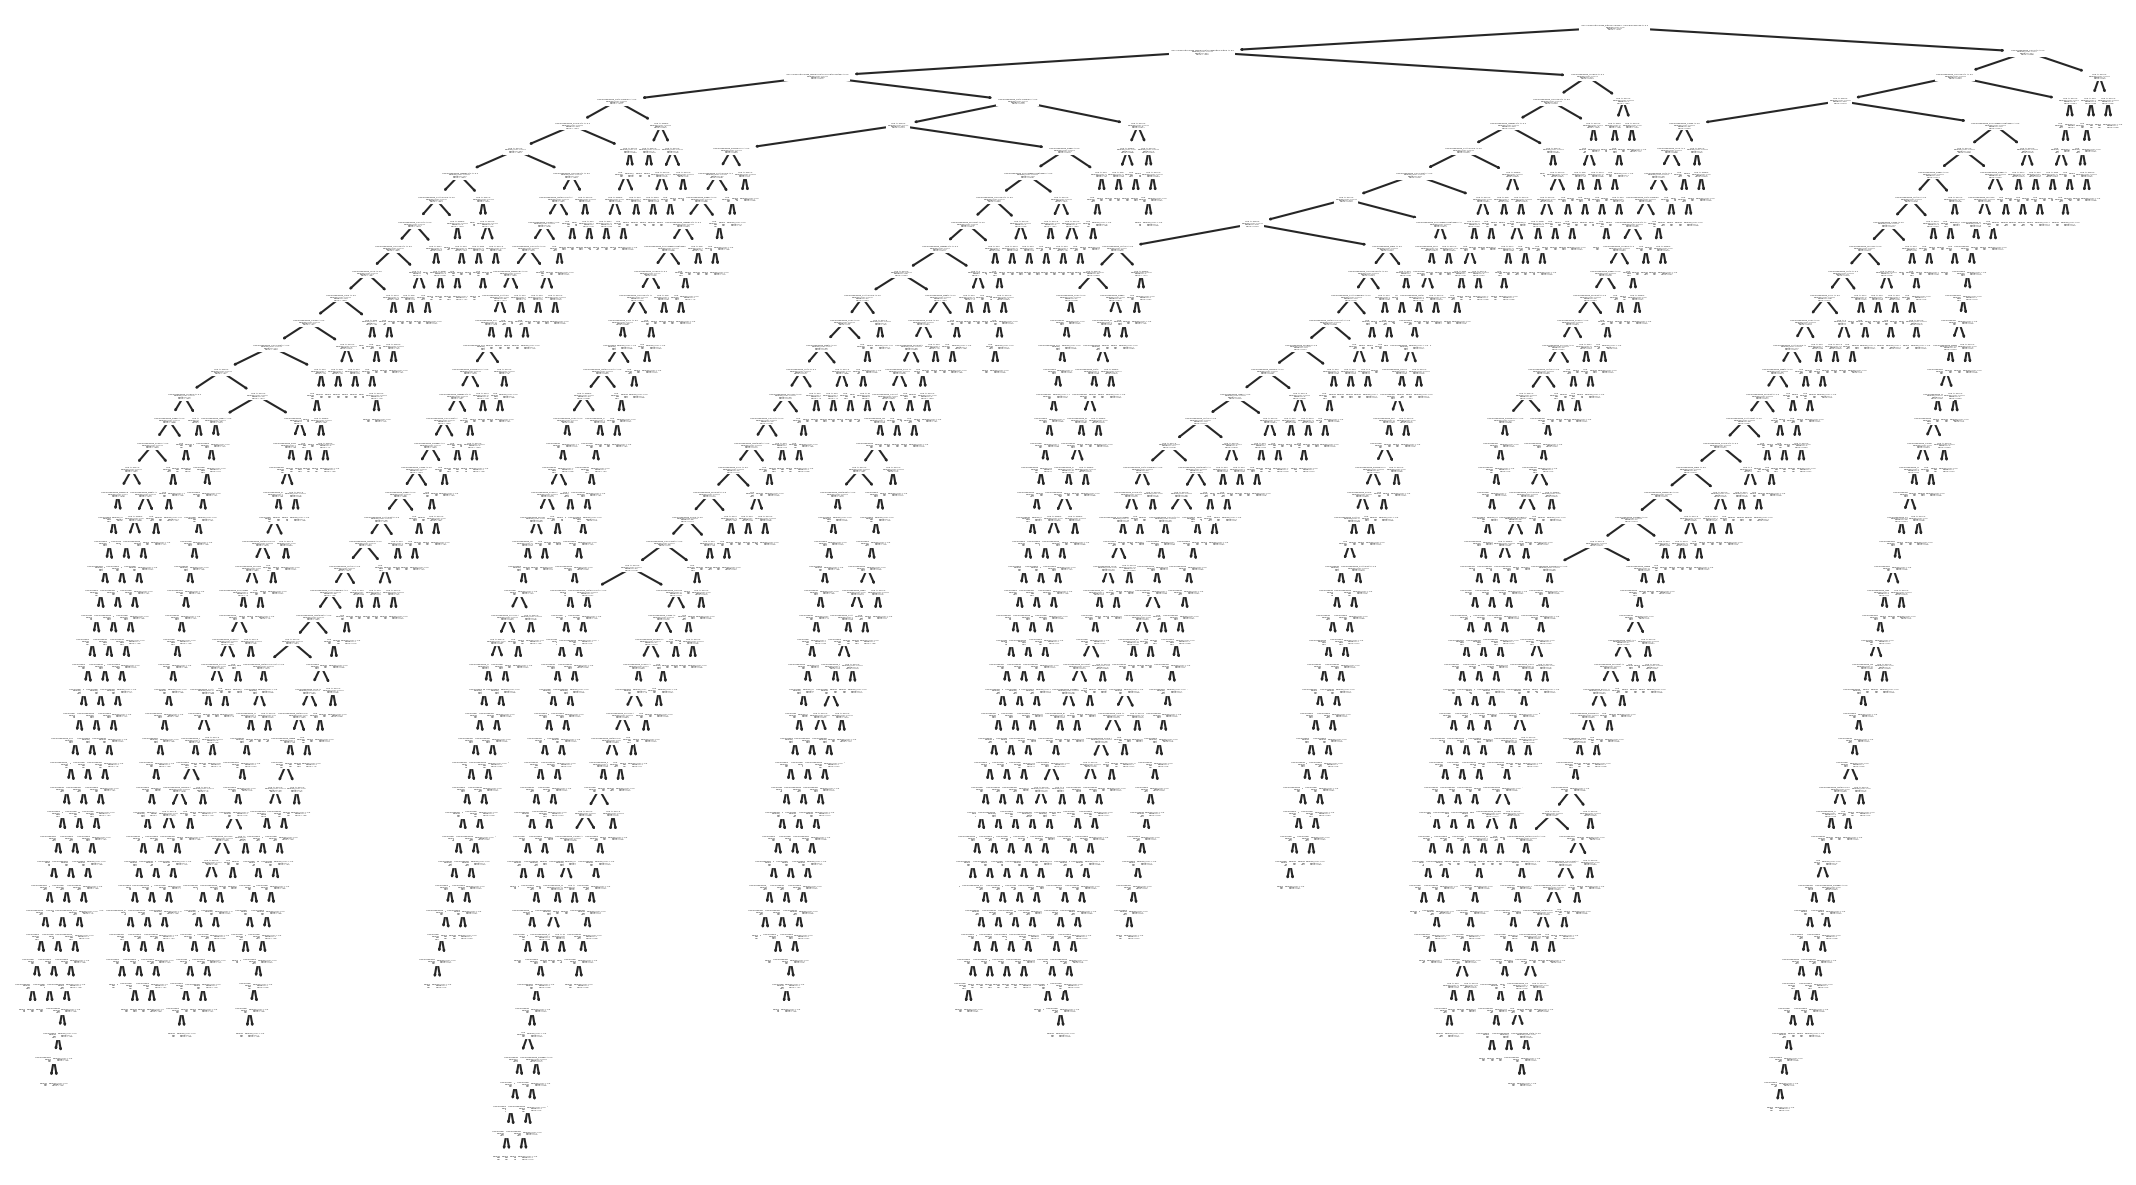

In [86]:
from sklearn.tree import plot_tree

feature_names = X.columns.tolist()  

plt.figure(figsize=(18, 10), dpi=150)
plot_tree(decision_Regressor, feature_names=feature_names)
plt.show()


## Confusion Matrix for the Decision Tree Regression

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Calculate cm by calling the 'confusion_matrix' method
cm = confusion_matrix(y_test, decision_pred)

# Call the 'heatmap' method to plot the confusion matrix
sns.heatmap(cm, annot=True)

# Print the classification report based on y_test and decision_pred
print(classification_report(y_test, decision_pred))

ValueError: continuous is not supported

# Linear Regression

In [ ]:
# Assuming 'pop_data' is your DataFrame and 'cols' is a list of column names
numeric_cols = pop_data.select_dtypes(include=['number']).columns
cm = np.corrcoef(pop_data[numeric_cols].values.T)

# Rest of your code for plotting the heatmap
sns.set(font_scale=1.1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols, xticklabels=cols)
plt.tight_layout()
plt.show()


In [ ]:
# Create a class named as 'LinearRegressionGD'
class LinearRegressionGD(object):
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [ ]:
x.shape, y.shape

In [ ]:
# Initialise an object (lr) using the created function LinearRegressionGD()
lr = LinearRegressionGD()

# Train the model by calling fit() mentiof
lr.fit(x, y)